In [4]:
#libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [5]:
file = r"..\data\clean\complete_clean.csv"
file_test = r"..\data\clean\test_group_clean.csv"
file_control = r"..\data\clean\control_group_clean.csv"

df_all = pd.read_csv(file)
df_test = pd.read_csv(file_test)
df_control =  pd.read_csv(file_control)
df_demo = pd.read_csv('../data/clean/final_demo_clean.csv')

In [6]:
df_demo.head()

,client_id,tenure_mth,age,gender,num_accounts,bal,calls_6_mth,logons_6_mth
0,836976,73,60,U,2,45105.30,6,9
1,2304905,94,58,U,2,110860.30,6,9
2,1439522,64,32,U,2,52467.79,6,9
3,1562045,198,49,M,2,67454.65,3,6
4,5126305,145,33,F,2,103671.75,0,3


In [7]:
max_age_test = df_demo['age'].max()
max_age_control = df_demo['age'].max()

min_age_test = df_demo['age'].min()
min_age_control = df_demo['age'].min()

print('Control max and min ages', max_age_control, min_age_control)
print('Test max and min ages', max_age_test, min_age_test)

Control max and min ages 96 17
Test max and min ages 96 17


In [8]:
test_clients = df_test['client_id'].unique()
control_clients = df_control['client_id'].unique()

control_demo = df_demo[df_demo['client_id'].isin(control_clients)]
test_demo = df_demo[df_demo['client_id'].isin(test_clients)]

test_demo['age'].describe()

count    26968.000000
mean        46.885271
std         15.522734
min         17.000000
25%         33.000000
50%         47.000000
75%         59.000000
max         96.000000
Name: age, dtype: float64

In [9]:
control_demo['age'].describe()

count    23532.000000
mean        47.256884
std         15.527896
min         17.000000
25%         33.000000
50%         48.000000
75%         60.000000
max         96.000000
Name: age, dtype: float64

In [10]:
test_completed_clients = df_test[df_test['process_step'] == 'validate']['client_id']
control_completed_clients = df_control[df_control['process_step'] == 'validate']['client_id']

In [11]:
completed_test_demo = df_demo[df_demo['client_id'].isin(test_completed_clients)]
completed_test_demo['age'].describe()

count    18687.000000
mean        46.165463
std         15.361010
min         17.000000
25%         32.000000
50%         47.000000
75%         59.000000
max         95.000000
Name: age, dtype: float64

In [12]:
completed_control_demo = df_demo[df_demo['client_id'].isin(control_completed_clients)]
completed_control_demo['age'].describe()

count    15434.000000
mean        46.531489
std         15.174787
min         17.000000
25%         33.000000
50%         47.000000
75%         59.000000
max         93.000000
Name: age, dtype: float64

In [ ]:
def describe_group(group):
    if group=='test':
        test_completed_clients = df_test[df_test['process_step'] == 'validate']['client_id']
        uncompleted_test_demo = df_demo[~df_demo['client_id'].isin(test_completed_clients) & df_demo['client_id'].isin(df_test['client_id'])]
        print('Uncompleted process')
        print(uncompleted_test_demo.describe())

        completed_test_demo = df_demo[df_demo['client_id'].isin(test_completed_clients)]
        print('Completed process')
        print(completed_test_demo.describe())

        return uncompleted_test_demo, completed_test_demo
    
    elif group=='control':
        control_completed_clients = df_control[df_control['process_step'] == 'validate']['client_id']
        uncompleted_control_demo = df_demo[~df_demo['client_id'].isin(control_completed_clients) & df_demo['client_id'].isin(df_control['client_id'])]
        print('Uncompleted process')
        print(uncompleted_control_demo.describe())

        completed_control_demo = df_demo[df_demo['client_id'].isin(control_completed_clients)]
        print('Completed process')
        print(completed_control_demo.describe())

        return uncompleted_control_demo, completed_control_demo
    else:
        print('Not a known group. Only select test or control group.')
        return 0

In [14]:
_, _ = describe_group('test')

Uncompleted process
          client_id   tenure_mth          age  num_accounts           bal  \
count  8.281000e+03  8281.000000  8281.000000   8281.000000  8.281000e+03   
mean   5.026443e+06   150.927786    48.509600      2.204202  1.423885e+05   
std    2.886646e+06    81.326184    15.762234      0.482757  2.907421e+05   
min    9.340000e+02    33.000000    18.000000      2.000000  2.378949e+04   
25%    2.541450e+06    82.000000    35.000000      2.000000  3.984525e+04   
50%    5.002894e+06   139.000000    50.000000      2.000000  6.503284e+04   
75%    7.550317e+06   191.000000    61.000000      2.000000  1.354481e+05   
max    9.999832e+06   669.000000    96.000000      7.000000  8.986420e+06   

       calls_6_mth  logons_6_mth  
count  8281.000000   8281.000000  
mean      2.933945      5.984181  
std       2.194494      2.177701  
min       0.000000      3.000000  
25%       1.000000      4.000000  
50%       3.000000      6.000000  
75%       5.000000      8.000000  
max   

In [15]:
_, _ = describe_group('control')

Uncompleted process
          client_id   tenure_mth          age  num_accounts           bal  \
count  8.098000e+03  8098.000000  8098.000000   8098.000000  8.098000e+03   
mean   4.982628e+06   152.131514    48.639417      2.215979  1.436921e+05   
std    2.887701e+06    81.720331    16.090200      0.494911  2.922477e+05   
min    1.028000e+03    33.000000    18.000000      2.000000  2.378986e+04   
25%    2.473338e+06    82.000000    34.000000      2.000000  4.016560e+04   
50%    4.990374e+06   141.000000    50.000000      2.000000  6.567697e+04   
75%    7.437261e+06   193.000000    61.000000      2.000000  1.365757e+05   
max    9.998921e+06   668.000000    96.000000      6.000000  8.292996e+06   

       calls_6_mth  logons_6_mth  
count  8098.000000   8098.000000  
mean      3.043097      6.085947  
std       2.189829      2.178810  
min       0.000000      3.000000  
25%       1.000000      4.000000  
50%       3.000000      6.000000  
75%       5.000000      8.000000  
max   

#### Pourcentage de drop à chaque étape du funnel


Taux d’abandon (%) entre les étapes du funnel.

Taux de conversion globale (%) du funnel.

In [ ]:
#cross tab des variations par step 

crosstab_all = pd.crosstab(df_all["process_step"], df_all["variation"])

#percentage per step -> Completion Rate
control_counts = crosstab_all['control']
test_counts = crosstab_all['test']

control_start = control_counts.iloc[0]
test_start = test_counts.iloc[0]
print(control_start)
control_percentages = [count / control_start * 100 for count in control_counts]
test_percentages = [count / test_start * 100 for count in test_counts]

print("Control :", control_percentages)
print("Test :", test_percentages)

variation     control   test
process_step                
start           47608  56474
step_1          29668  38768
step_2          25886  30989
step_3          22795  25894
validate        17505  25722


In [19]:
#dataviz
x = np.arange(len(steps))  
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))


# size and personalization 
ax.bar(x - bar_width / 2, control_percentages, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_percentages, bar_width, label='Test', color='orange')

# add percentage to barplot
for i, (c_perc, t_perc) in enumerate(zip(control_percentages, test_percentages)):
    ax.text(i - bar_width / 2, c_perc + 1, f"{int(c_perc)}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_perc + 1, f"{int(t_perc)}%", ha='center', va='bottom')


ax.set_xticks(x)
ax.set_xticklabels(steps)
ax.set_xlabel('Funnel steps')
ax.set_ylabel('remaining user (%)')
ax.set_ylim(0, 110)  
ax.set_title('Funnel drop for each step by Variation (Control vs Test)')
ax.legend()

plt.tight_layout()
plt.show()

NameError: name 'steps' is not defined

Conclusion: The influence of the previous installment of the funnel on the control user

completion rate: 
 
 - Test: 45%
 - Control : 36%

In [ ]:
#Drop-out Rate

control_dropout_rates = []
for i in range(1, len(control_counts)):
    rate = ((control_counts[i-1] - control_counts[i]) / control_counts[i-1]) * 100
    control_dropout_rates.append(rate)


test_dropout_rates = []
for i in range(1, len(test_counts)):
    rate = ((test_counts[i-1] - test_counts[i]) / test_counts[i-1]) * 100
    test_dropout_rates.append(rate)


steps_dropout = steps[1:]  


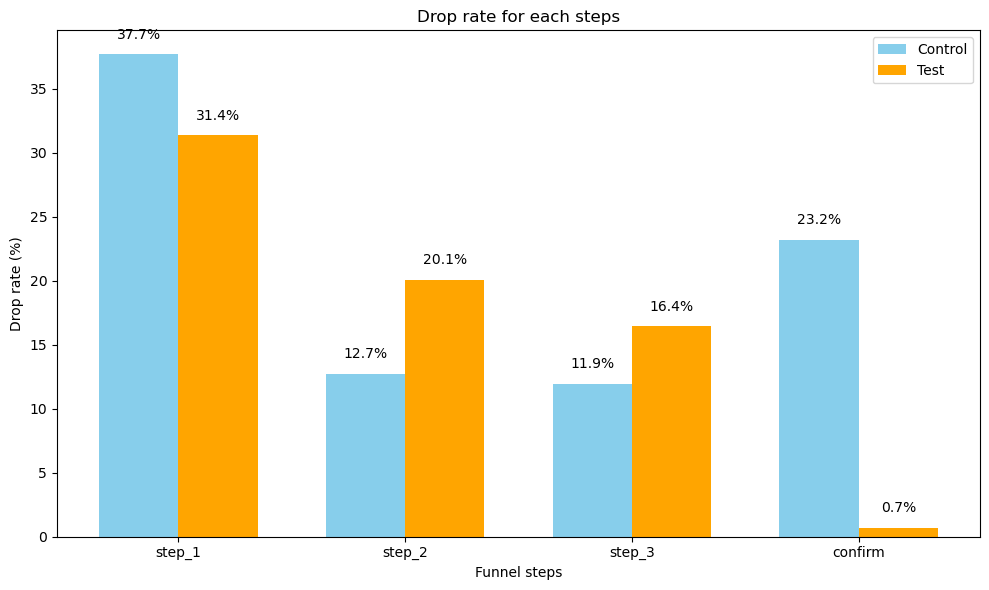

In [ ]:
# dataviz
x = np.arange(len(steps_dropout)) 
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x - bar_width / 2, control_dropout_rates, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_dropout_rates, bar_width, label='Test', color='orange')


for i, (c_rate, t_rate) in enumerate(zip(control_dropout_rates, test_dropout_rates)):
    ax.text(i - bar_width / 2, c_rate + 1, f"{c_rate:.1f}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_rate + 1, f"{t_rate:.1f}%", ha='center', va='bottom')


ax.set_xticks(x)
ax.set_xticklabels(steps_dropout)
ax.set_xlabel('Funnel steps')
ax.set_ylabel('Drop rate (%)')
ax.set_title('Drop rate for each steps')
ax.legend()

plt.tight_layout()
plt.show()

Conclusion : 

The visualization highlights the dropout rates at each step of the funnel for both the Control and Test groups. Key observations include:

Step 1 has the highest dropout rate for both groups, with 37.7% in Control and 31.4% in Test, indicating significant user loss at the initial stage.

The Test group consistently outperforms the Control group, showing lower dropout rates across all steps, particularly at Step 2 (12.7% vs. 20.1%) and Step 3 (11.9% vs. 16.4%).

The confirm step has almost negligible dropout for both groups, indicating that users who reach this stage are very likely to complete the process.

This suggests that the Test variation improves user retention, particularly in the later steps of the funnel. However, the high dropout at Step 1 should be a priority for optimization.

In [ ]:
# Time Spent per Step

#### Nombre de sessions nécessaires pour atteindre la conversion (confirm)

Nombre moyen de sessions par utilisateur avant la conversion.

Distribution des sessions (médiane, percentiles).

In [ ]:
#completion rate
# Step 1: Filter data for users who reached "confirm"
df_confirm = df_all[df_all["process_step"] == "confirm"]

sessions_per_user = df_all.groupby("client_id")["visit_id"].nunique().reset_index()
sessions_per_user.columns = ["client_id", "session_count"]

df_variation = df_confirm[["client_id", "Variation"]].drop_duplicates()
sessions_per_user = sessions_per_user.merge(df_variation, on="client_id")

stats = sessions_per_user.groupby("Variation")["session_count"].describe()

print(stats)



             count      mean       std  min  25%  50%  75%   max
Variation                                                       
Control    15428.0  1.406469  0.879166  1.0  1.0  1.0  2.0  18.0
Test       18682.0  1.414303  0.859092  1.0  1.0  1.0  2.0  14.0


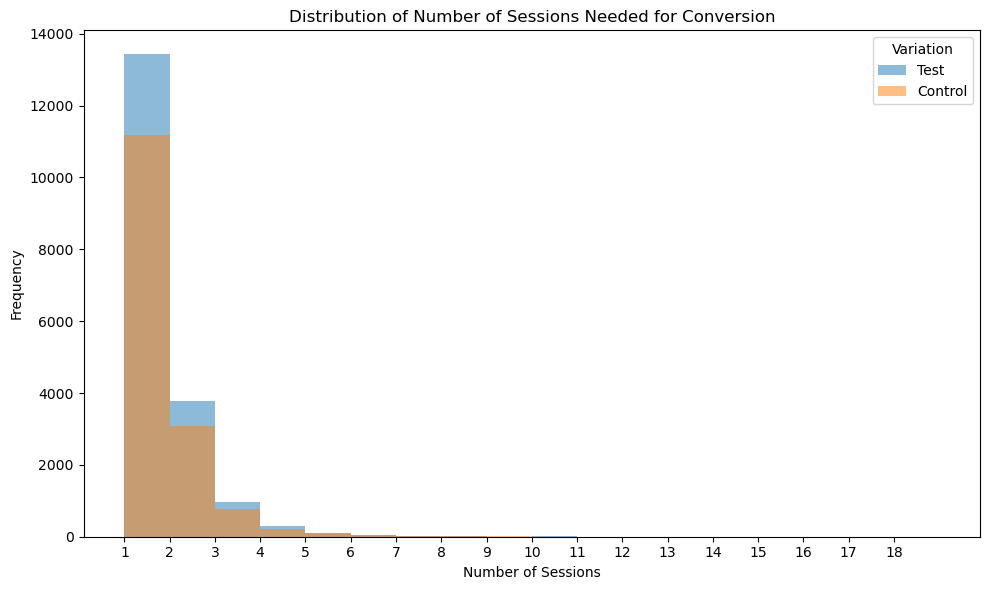

In [ ]:
plt.figure(figsize=(10, 6))

for variation in sessions_per_user["Variation"].unique():
    subset = sessions_per_user[sessions_per_user["Variation"] == variation]
    plt.hist(subset["session_count"], bins=range(1, subset["session_count"].max() + 2), 
             alpha=0.5, label=variation)

plt.title("Distribution of Number of Sessions Needed for Conversion")
plt.xlabel("Number of Sessions")
plt.ylabel("Frequency")
plt.legend(title="Variation")
plt.xticks(range(1, sessions_per_user["session_count"].max() + 1))
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_8280\964781452.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2")


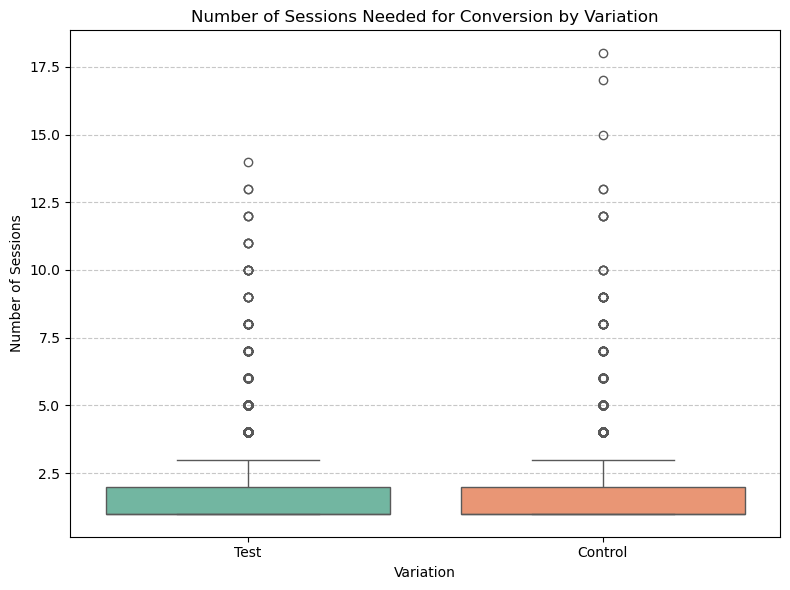

In [ ]:

sessions_per_user["Variation"] = sessions_per_user["Variation"].replace({"Control": "Control", "Test": "Test"}) 
plt.figure(figsize=(8, 6))

sns.boxplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2")

plt.title("Number of Sessions Needed for Conversion by Variation")
plt.xlabel("Variation")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_8280\1586418212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2", inner="quartile")


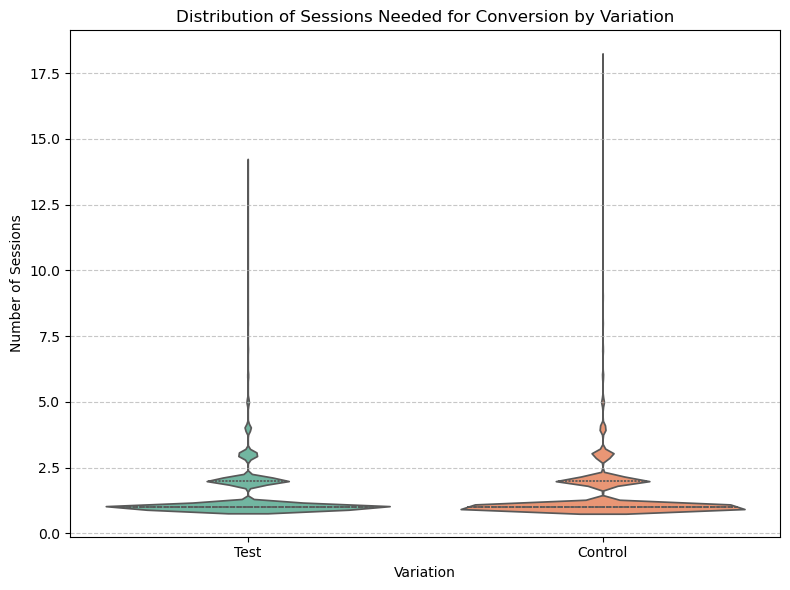

In [ ]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2", inner="quartile")

plt.title("Distribution of Sessions Needed for Conversion by Variation")
plt.xlabel("Variation")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Completion rate 

conclusion

15,428 users in the control group converted.
18,682 users in the test group converted.
This suggests that, in terms of total conversions, the Test group performed better than the Control group.

Average Number of Sessions Needed:

Users in the Control group needed 1.41 sessions on average to convert.
Likewise, 1.41 sessions were needed by users in the Test group.
There is no discernible improvement in the number of sessions required for conversion between the two groups, indicating a negligible difference.

